## BUSA8031 Business Analytics Project – Assignment 3

#### Approach: 
##### Data collection: 
- We use the most widely used sources is the "Our World in Data" (OWID) COVID-19 dataset, which provides global COVID-19 statistics as the dataset includes information on daily onew Covid-19 cases and hospitablised patients in these three countries.

##### 1. Analyze how the factors of number of people vaccinated, population density, age 65 older, hospital beds per thousand, and stringency index influence the spread of the virus for all countries in the world.

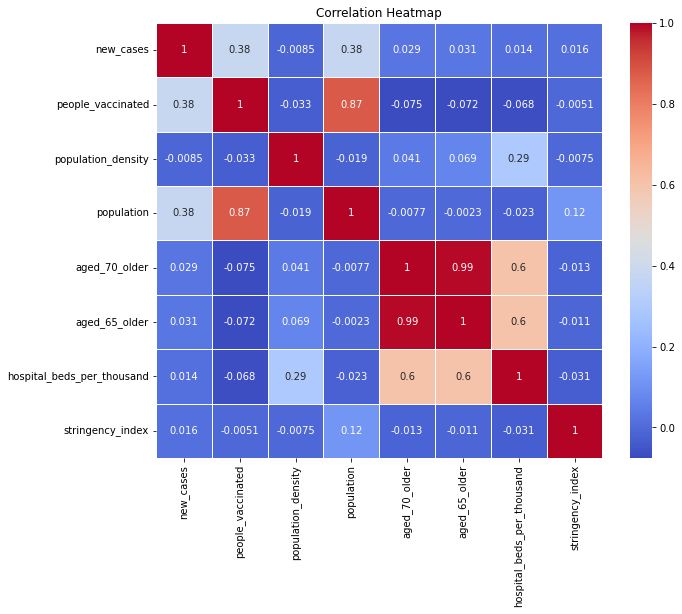

In [1]:
import pandas as pd

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Handle missing values if necessary
data.dropna(subset=['date'], inplace=True)

# Calculate correlations
correlation_matrix = data[['new_cases', 'people_vaccinated','population_density','population','aged_70_older','aged_65_older', 'hospital_beds_per_thousand', 'stringency_index']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

The heatmap provides a clear visual representation of the correlations as below:
- Factors have strong correlations to covid-19 outcome: population of the country, number of people got vaccinated
- Factors also have medium correlations to covid-19 outcomes: aging of population, number of hospitals per thousand people and stringency index.
- Factors do not have a strong correlations to covid-19 outcomes: population indensity


##### 2. Analyze the trends in COVID-19 cases, deaths, and recoveries over time for Australia, New Zealand and Canada:
The reasons to choose these three countries: they have similar charateristic including geographical location, economy, and demographics as well as healthcare and education. 

| Syntax                    | New Zealand | Canada        |
| :---                      |    :----    |          :--- |
|                           |             |               |
| Geographical Location     | Geographically close to Australia, sharing a similar climate and culture      | Although not in the same region, Canada shares similarities in terms of vast landmass, multiculturalism, and strong natural resource sectors      |
| Economy                   |A developed economy with a strong agricultural sector and tourism industry, similar to Australia    |Rich in natural resources, Canada's economy has similarities to Australia's reliance on mining and commodities              |
| Demographics              |A culturally diverse society with a mix of indigenous and immigrant populations    |A multicultural and diverse population, like Australia   |
| Healthcare and Education  |Has a well-developed healthcare system and education sector |Offers a high standard of healthcare and education, similar to Australia  |

- Convert the date column into a time series format, making it easier to analyze trends over time.
- Create line plots or time series plots to visualize the daily or weekly trends in new Covid-19 cases and hospitablised patients over time.


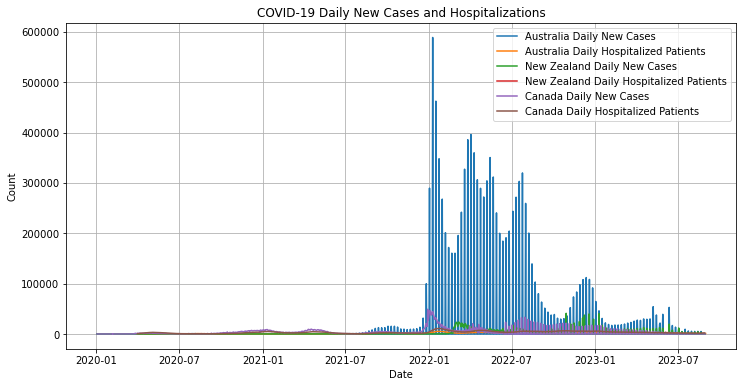

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Filter data for Australia, New Zealand, and Canada
countries = ['Australia', 'New Zealand', 'Canada']
filtered_data = data[data['location'].isin(countries)].copy()

# Convert the 'date' column to datetime
filtered_data['date'] = pd.to_datetime(filtered_data['date'], errors='coerce')

# Set the 'date' column as the index
filtered_data.set_index('date', inplace=True)

# Plot COVID-19 daily new cases and hospitalizations for the selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_data[filtered_data['location'] == country]
    plt.plot(country_data.index, country_data['new_cases'], label=f'{country} Daily New Cases')
    plt.plot(country_data.index, country_data['hosp_patients'], label=f'{country} Daily Hospitalized Patients')

plt.title('COVID-19 Daily New Cases and Hospitalizations')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

Data is not at vailable for 2020 and 2021 but available only for 2022 and year-to-date 2023.
Three countries show a declining trend of covid-19 cases in 2022 and YTD 2023.

##### 3. Prediction of covid-19 cases for Australia:

/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_16256/797587998.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'], errors='coerce')
/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_16256/797587998.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[forecast_column].fillna(0, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 

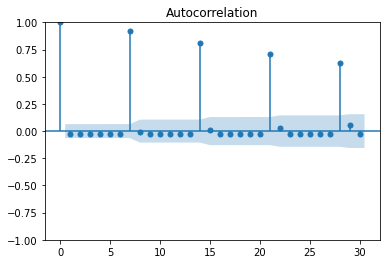

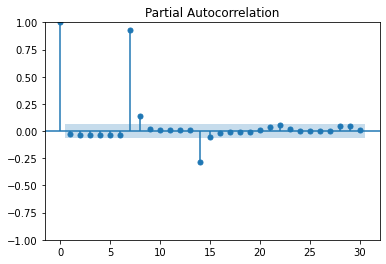

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error (MSE): 1670851408.2818902
R-squared (R2) Score: -1.8402527318202817


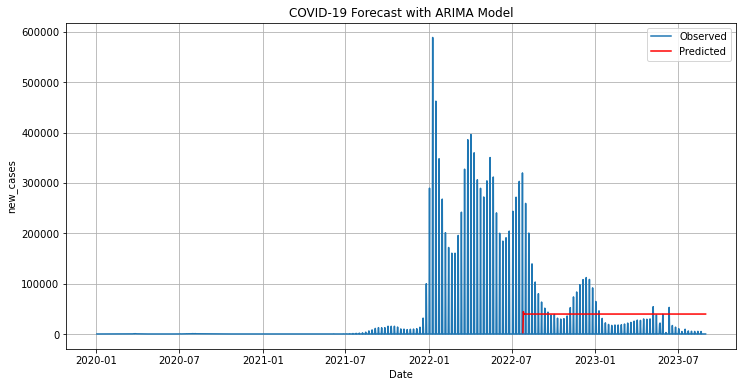

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Filter data for a specific country (e.g., Australia)
country_data = data[data['location'] == 'Australia']

# Convert the 'date' column to datetime
country_data['date'] = pd.to_datetime(country_data['date'], errors='coerce')

# Set the 'date' column as the index
country_data.set_index('date', inplace=True)

# Select the column you want to forecast (e.g., 'new_cases')
forecast_column = 'new_cases'

# Handle missing values (NaN) by replacing them with 0
country_data[forecast_column].fillna(0, inplace=True)

# Perform a train-test split
train_size = int(len(country_data) * 0.7)
train_data, test_data = country_data[forecast_column][:train_size], country_data[forecast_column][train_size:]

# Determine the order (p, d, q) for the ARIMA model using ACF and PACF plots
plot_acf(train_data)
plot_pacf(train_data)
plt.show()

# Based on ACF and PACF plots, determine the order (p, d, q)
p, d, q = 1, 1, 1  # Adjust these values based on the plots

# Create and fit the ARIMA model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=len(test_data))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R-Squared
from sklearn.metrics import r2_score
r2 = r2_score(test_data, forecast)
print(f"R-squared (R2) Score: {r2}")

# Plot the observed vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data[forecast_column], label='Observed')
plt.plot(test_data.index, forecast, label='Predicted', color='red')
plt.title('COVID-19 Forecast with ARIMA Model')
plt.xlabel('Date')
plt.ylabel(f'{forecast_column}')
plt.legend()
plt.grid(True)
plt.show()

The prediction model above is not performing well. We need to consider other prediction models.

##### 4. We will use the SARIMA (Seasonal Autoregressive Integrated Moving Average) model, which is suitable for capturing seasonality and trends, to predict COVID-19 cases in the future for Australia:

/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_16256/2693073034.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data['date'] = pd.to_datetime(country_data['date'], errors='coerce')
/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_16256/2693073034.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data[forecast_column].fillna(0, inplace=True)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self.

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10386D+01    |proj g|=  1.24935D-01

At iterate    5    f=  1.09936D+01    |proj g|=  4.82375D-02

At iterate   10    f=  1.09854D+01    |proj g|=  1.26611D-02

At iterate   15    f=  1.09816D+01    |proj g|=  6.94411D-03

At iterate   20    f=  1.09812D+01    |proj g|=  5.30993D-04

At iterate   25    f=  1.09812D+01    |proj g|=  1.67518D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   

/var/folders/r6/dlrh7x6n705fgfpcmf0ljhxc0000gn/T/ipykernel_16256/2693073034.py:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=country_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, closed='right')


ValueError: x and y must have same first dimension, but have shapes (29,) and (30,)

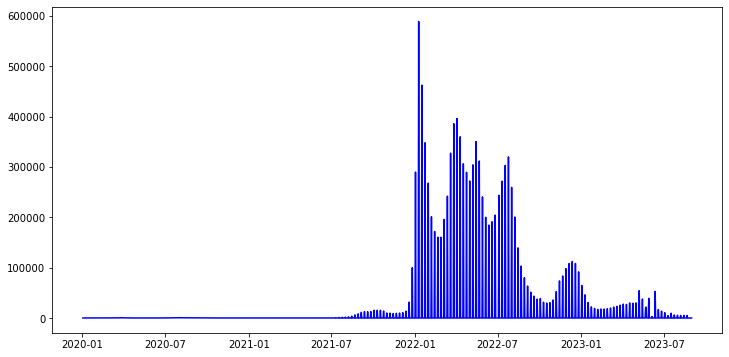

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the OWID COVID-19 dataset
data = pd.read_csv('owid-covid-data.csv')

# Filter data for Australia
country_data = data[data['location'] == 'Australia']

# Convert the 'date' column to datetime
country_data['date'] = pd.to_datetime(country_data['date'], errors='coerce')

# Set the 'date' column as the index
country_data.set_index('date', inplace=True)

# Select the column you want to forecast (e.g., 'new_cases')
forecast_column = 'new_cases'

# Handle missing values (NaN) by replacing them with 0
country_data[forecast_column].fillna(0, inplace=True)

# Define the SARIMA model parameters (p, d, q, P, D, Q, and m)
p, d, q = 2, 1, 1  # Autoregressive, differencing, and moving average orders
P, D, Q, m = 1, 1, 1, 7  # Seasonal orders and seasonal period

# Create and fit the SARIMA model
model = SARIMAX(country_data[forecast_column], order=(p, d, q), seasonal_order=(P, D, Q, m))
model_fit = model.fit()

# Define the number of future periods to forecast
forecast_periods = 30  # Adjust as needed

# Make future predictions
forecast = model_fit.get_forecast(steps=forecast_periods)

# Get confidence intervals for the predictions
forecast_conf_int = forecast.conf_int()

# Create a date range for the forecasted periods, including the last date of the observed data
forecast_index = pd.date_range(start=country_data.index[-1] + pd.Timedelta(days=1), periods=forecast_periods, closed='right')

# Plot the observed and forecasted COVID-19 cases
plt.figure(figsize=(12, 6))
plt.plot(country_data.index, country_data[forecast_column], label='Observed', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.title('COVID-19 Forecast for Australia (SARIMA)')
plt.xlabel('Date')
plt.ylabel(f'{forecast_column}')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values for the next 30 days
print(forecast.predicted_mean)